In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import pearsonr

csvpath_fbi = "FullCrimeStatsFinal.csv"
csvpath_census = ("CensusDataFrameCleanSplit.csv")

crime_df = pd.read_csv(csvpath_fbi)
census_df = pd.read_csv(csvpath_census)

#crime_df.head()
census_df.head()

,Unnamed: 0,State,County,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployed Citizens,Men in Law-Enforcement,Women in Law-Enforcement,Law-Enforcement per 1000,Unemployment Rate (%)
0,0,ARKANSAS,CARROLL,27690,44.4,38145,20888,4789,17.295052,739,91,4,3.430841,2.668834
1,1,ARKANSAS,CHICOT,11189,43.7,29628,18853,3252,29.064260,446,131,17,13.227277,3.986058
2,2,ARKANSAS,CLARK,22684,33.6,35595,19500,4762,20.992770,858,94,12,4.672897,3.782402
3,3,ARKANSAS,CLAY,15202,44.0,32404,19192,3340,21.970793,474,76,0,4.999342,3.118011
4,4,ARKANSAS,CLEBURNE,25587,47.9,41717,25078,3901,15.246023,903,98,9,4.181811,3.529136


In [4]:
fbi_census_df = pd.merge(crime_df,census_df,on=["County","State"],how="left")
fbi_census_df.head()

,Unnamed: 0_x,Unnamed: 0.1,State,County,Female Civilians,Female Officers,Male Civilians,Male Officers,Crime Cleared Count aggravated-assault,Crime Cleared Count arson,...,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployed Citizens,Men in Law-Enforcement,Women in Law-Enforcement,Law-Enforcement per 1000,Unemployment Rate (%)
0,0,0,ALABAMA,BLOUNT,14,3,11,49,65,3,...,40.8,46212,21033,9441,16.361084,1367,268,30,5.164287,2.368987
1,1,1,ALABAMA,BUTLER,9,0,4,51,37,1,...,40.6,34315,19011,5126,25.276134,849,88,40,6.311637,4.186391
2,2,2,ALABAMA,CHILTON,5,6,1,65,65,2,...,38.7,42594,22045,8779,20.035603,1520,226,0,5.157815,3.468973
3,3,3,ALABAMA,COVINGTON,13,4,10,72,98,0,...,42.9,37313,21738,7031,18.635532,1723,110,68,4.717856,4.566779
4,4,4,ALABAMA,CRENSHAW,5,0,2,23,7,0,...,41.6,37557,20455,2484,17.875648,452,34,2,2.590674,3.252735


In [5]:
fbi_census_df.count()

Unnamed: 0_x                               560
Unnamed: 0.1                               560
State                                      560
County                                     560
Female Civilians                           560
Female Officers                            560
Male Civilians                             560
Male Officers                              560
Crime Cleared Count aggravated-assault     560
Crime Cleared Count arson                  560
Crime Cleared Count burglary               560
Crime Cleared Count homicide               560
Crime Cleared Count human-trafficing       560
Crime Cleared Count larceny                560
Crime Cleared Count motor-vehicle-theft    560
Crime Cleared Count property-crime         560
Crime Cleared Count rape                   560
Crime Cleared Count rape-legacy            560
Crime Cleared Count robbery                560
Crime Cleared Count violent-crime          560
Total Crime Count aggravated-assault       560
Total Crime C

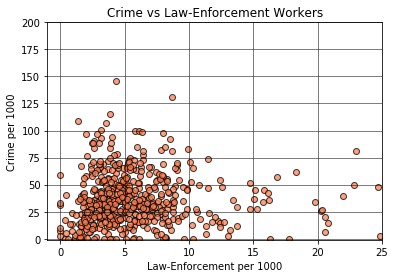

In [6]:
#fbi_census_df


x_axis = fbi_census_df["Law-Enforcement per 1000"]
y_axis = fbi_census_df["Total Crime"]/fbi_census_df["Population"]*1000
#size = fbi_census_df["Population"]


# Build the scatter plots for each city types

plt.scatter(x_axis,y_axis,facecolors="coral",edgecolors="black",alpha=0.75)

# Incorporate the other graph properties

plt.title("Crime vs Law-Enforcement Workers")
plt.xlabel("Law-Enforcement per 1000")
plt.ylabel("Crime per 1000")
plt.xlim(-1,25)
plt.ylim(-1,200)

plt.grid(color="black",linestyle="-",linewidth=0.5)

plt.savefig('Graph_Pics/CrimevLaw-Enforcement.png', bbox_inches='tight')

In [26]:
#x_axis_df = pd.DataFrame(x_axis)
#cleaned_x_axis = x_axis_df.loc[x_axis_df["Law-Enforcement per 1000"] <= 25]
#clean_x_axis = cleaned_x_axis.drop(cleaned_x_axis.sample(n=1).index)


#y_axis_df = pd.DataFrame(y_axis)
#clean_y_axis = y_axis_df.loc[y_axis_df[0] <= 200]

#clean_x_axis
#clean_y_axis


#pearsonr_coefficient, p_value = pearsonr(clean_x_axis,clean_y_axis)
#print (pearsonr_coefficient)

In [20]:
pearsonr_coefficient, p_value = pearsonr(x_axis,y_axis)
print (pearsonr_coefficient)

-0.024627455471846967


In [27]:
crit_val = stats.chi2.ppf(q = 0.95, df = 2)
print (crit_val)
e_x_axis = x_axis.mean()
e_y_axis = y_axis.mean()

x_df = pd.DataFrame(x_axis)
x_df["Expected"] = e_x_axis
y_df = pd.DataFrame(y_axis)
y_df["Expected"] = e_y_axis

#y_df
stats.chisquare(x_df["Law-Enforcement per 1000"], x_df['Expected'])
#stats.chisquare(y_df[0], y_df['Expected'])

#stats.ttest_ind(x_df["Law-Enforcement per 1000"], x_df['Expected'], equal_var=False)
#stats.ttest_ind(y_df["Population"], y_df['Expected Population'], equal_var=False)


5.991464547107979


Power_divergenceResult(statistic=1727.3914652360843, pvalue=1.9609015713155806e-119)

In [28]:
stats.chisquare(y_df[0], y_df['Expected'])

Power_divergenceResult(statistic=65614.83154478295, pvalue=0.0)

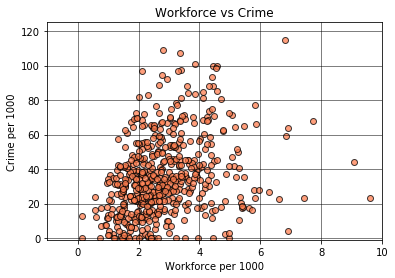

In [30]:
#fbi_census_df

x_axis = fbi_census_df["Total Workforce"]/fbi_census_df["Population"]*1000
y_axis = fbi_census_df["Total Crime"]/fbi_census_df["Population"]*1000
#size = fbi_census_df["Population"]


# Build the scatter plots for each city types

plt.scatter(x_axis,y_axis,facecolors="coral",edgecolors="black",alpha=0.75)

# Incorporate the other graph properties

plt.title("Workforce vs Crime")
plt.xlabel("Workforce per 1000")
plt.ylabel("Crime per 1000")
plt.xlim(-1,10)
plt.ylim(-1,125)


plt.grid(color="black",linestyle="-",linewidth=0.5)

plt.savefig('Graph_Pics/WorkforcevCrime.png', bbox_inches='tight')

In [31]:
#cleaned_x_axis = fbi_census_df.loc[fbi_census_df["Law-Enforcement per 1000"] <= 25]
#cleaned_y_axis = fbi_census_df.loc[fbi_census_df["Total Crime"]/fbi_census_df["Population"]*1000 <= 200]

pearsonr_coefficient, p_value = pearsonr(x_axis,y_axis)
print (pearsonr_coefficient)

0.8307632563476705


In [32]:
crit_val = stats.chi2.ppf(q = 0.95, df = 2)
print (crit_val)
e_x_axis = x_axis.mean()
e_y_axis = y_axis.mean()

x_df = pd.DataFrame(x_axis)
x_df["Expected"] = e_x_axis
y_df = pd.DataFrame(y_axis)
y_df["Expected"] = e_y_axis

#y_df
stats.chisquare(x_df[0], x_df['Expected'])
#stats.chisquare(y_df[0], y_df['Expected'])

#stats.ttest_ind(x_df["Law-Enforcement per 1000"], x_df['Expected'], equal_var=False)
#stats.ttest_ind(y_df["Population"], y_df['Expected Population'], equal_var=False)


5.991464547107979


Power_divergenceResult(statistic=4415.238653273482, pvalue=0.0)

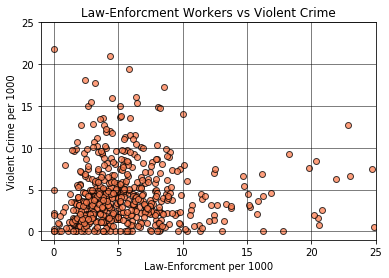

In [34]:
#fbi_census_df

x_axis = fbi_census_df["Law-Enforcement per 1000"]
y_axis = fbi_census_df["Total Violent Crime"]/fbi_census_df["Population"]*1000
#size = fbi_census_df["Population"]


# Build the scatter plots for each city types

plt.scatter(x_axis,y_axis,facecolors="coral",edgecolors="black",alpha=0.75)

# Incorporate the other graph properties

plt.title("Law-Enforcment Workers vs Violent Crime")
plt.xlabel("Law-Enforcment per 1000")
plt.ylabel("Violent Crime per 1000")
plt.xlim(-1,25)
plt.ylim(-1,25)


plt.grid(color="black",linestyle="-",linewidth=0.5)

plt.savefig('Graph_Pics/Law-EnforcementvViolentCrime.png', bbox_inches='tight')

In [35]:
#cleaned_x_axis = fbi_census_df.loc[fbi_census_df["Law-Enforcement per 1000"] <= 25]
#cleaned_y_axis = fbi_census_df.loc[fbi_census_df["Total Crime"]/fbi_census_df["Population"]*1000 <= 200]

pearsonr_coefficient, p_value = pearsonr(x_axis,y_axis)
print (pearsonr_coefficient)

-0.016755915885080856


In [36]:
crit_val = stats.chi2.ppf(q = 0.95, df = 2)
print (crit_val)
e_x_axis = x_axis.mean()
e_y_axis = y_axis.mean()

x_df = pd.DataFrame(x_axis)
x_df["Expected"] = e_x_axis
y_df = pd.DataFrame(y_axis)
y_df["Expected"] = e_y_axis

#y_df
#stats.chisquare(x_df["Law-Enforcement per 1000"], x_df['Expected'])
stats.chisquare(y_df[0], y_df['Expected'])

#stats.ttest_ind(x_df["Law-Enforcement per 1000"], x_df['Expected'], equal_var=False)
#stats.ttest_ind(y_df["Population"], y_df['Expected Population'], equal_var=False)

5.991464547107979


Power_divergenceResult(statistic=26519.3503491032, pvalue=0.0)

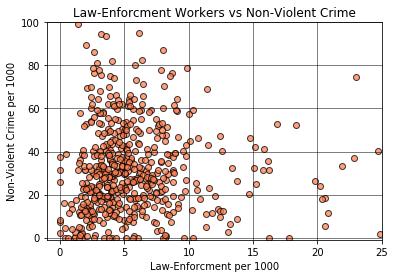

In [37]:
#fbi_census_df

x_axis = fbi_census_df["Law-Enforcement per 1000"]
y_axis = fbi_census_df["Total Non-Violent Crime"]/fbi_census_df["Population"]*1000
#size = fbi_census_df["Population"]


# Build the scatter plots for each city types

plt.scatter(x_axis,y_axis,facecolors="coral",edgecolors="black",alpha=0.75)

# Incorporate the other graph properties

plt.title("Law-Enforcment Workers vs Non-Violent Crime")
plt.xlabel("Law-Enforcment per 1000")
plt.ylabel("Non-Violent Crime per 1000")
plt.xlim(-1,25)
plt.ylim(-1,100)

plt.grid(color="black",linestyle="-",linewidth=0.5)

plt.savefig('Graph_Pics/Law-EnforcementvNon-ViolentCrime.png', bbox_inches='tight')

In [38]:
#cleaned_x_axis = fbi_census_df.loc[fbi_census_df["Law-Enforcement per 1000"] <= 25]
#cleaned_y_axis = fbi_census_df.loc[fbi_census_df["Total Crime"]/fbi_census_df["Population"]*1000 <= 200]

pearsonr_coefficient, p_value = pearsonr(x_axis,y_axis)
print (pearsonr_coefficient)

-0.026503952541372822


In [39]:
crit_val = stats.chi2.ppf(q = 0.95, df = 2)
print (crit_val)
e_x_axis = x_axis.mean()
e_y_axis = y_axis.mean()

x_df = pd.DataFrame(x_axis)
x_df["Expected"] = e_x_axis
y_df = pd.DataFrame(y_axis)
y_df["Expected"] = e_y_axis

#y_df
#stats.chisquare(x_df["Law-Enforcement per 1000"], x_df['Expected'])
stats.chisquare(y_df[0], y_df['Expected'])

#stats.ttest_ind(x_df["Law-Enforcement per 1000"], x_df['Expected'], equal_var=False)
#stats.ttest_ind(y_df["Population"], y_df['Expected Population'], equal_var=False)

5.991464547107979


Power_divergenceResult(statistic=46362.98932974215, pvalue=0.0)

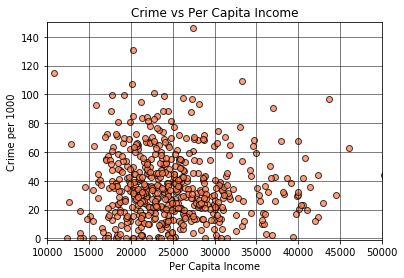

In [40]:
#fbi_census_df

x_axis = fbi_census_df["Per Capita Income"]
y_axis = fbi_census_df["Total Crime"]/fbi_census_df["Population"]*1000
#size = fbi_census_df["Population"]


# Build the scatter plots for each city types

plt.scatter(x_axis,y_axis,facecolors="coral",edgecolors="black",alpha=0.75)

# Incorporate the other graph properties

plt.title("Crime vs Per Capita Income")
plt.ylabel("Crime per 1000")
plt.xlabel("Per Capita Income")
plt.xlim(10000,50000)
plt.ylim(-1,150)


plt.grid(color="black",linestyle="-",linewidth=0.5)

plt.savefig('Graph_Pics/CrimevIncome.png', bbox_inches='tight')

In [41]:
#cleaned_x_axis = fbi_census_df.loc[fbi_census_df["Law-Enforcement per 1000"] <= 25]
#cleaned_y_axis = fbi_census_df.loc[fbi_census_df["Total Crime"]/fbi_census_df["Population"]*1000 <= 200]

pearsonr_coefficient, p_value = pearsonr(x_axis,y_axis)
print (pearsonr_coefficient)

0.015207981734439014


In [42]:
crit_val = stats.chi2.ppf(q = 0.95, df = 2)
print (crit_val)
e_x_axis = x_axis.mean()
e_y_axis = y_axis.mean()

x_df = pd.DataFrame(x_axis)
x_df["Expected"] = e_x_axis
y_df = pd.DataFrame(y_axis)
y_df["Expected"] = e_y_axis

#y_df
stats.chisquare(x_df["Per Capita Income"], x_df['Expected'])
#stats.chisquare(y_df[0], y_df['Expected'])

#stats.ttest_ind(x_df["Law-Enforcement per 1000"], x_df['Expected'], equal_var=False)
#stats.ttest_ind(y_df["Population"], y_df['Expected Population'], equal_var=False)

5.991464547107979


Power_divergenceResult(statistic=1013719.6374527243, pvalue=0.0)

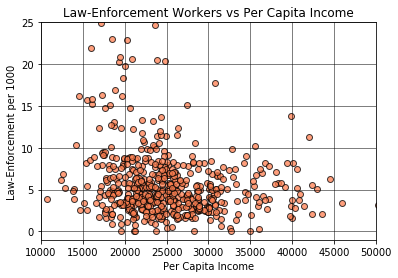

In [43]:
#fbi_census_df

x_axis = fbi_census_df["Per Capita Income"]
y_axis = fbi_census_df["Law-Enforcement per 1000"]
#size = fbi_census_df["Population"]


# Build the scatter plots for each city types

plt.scatter(x_axis,y_axis,facecolors="coral",edgecolors="black",alpha=0.75)

# Incorporate the other graph properties

plt.title("Law-Enforcement Workers vs Per Capita Income")
plt.ylabel("Law-Enforcement per 1000")
plt.xlabel("Per Capita Income")
plt.xlim(10000,50000)
plt.ylim(-1,25)


plt.grid(color="black",linestyle="-",linewidth=0.5)

plt.savefig('Graph_Pics/Law-EnforcementvIncome.png', bbox_inches='tight')

In [44]:
#cleaned_x_axis = fbi_census_df.loc[fbi_census_df["Law-Enforcement per 1000"] <= 25]
#cleaned_y_axis = fbi_census_df.loc[fbi_census_df["Total Crime"]/fbi_census_df["Population"]*1000 <= 200]

pearsonr_coefficient, p_value = pearsonr(x_axis,y_axis)
print (pearsonr_coefficient)

-0.19503883926438775


In [45]:
crit_val = stats.chi2.ppf(q = 0.95, df = 2)
print (crit_val)
e_x_axis = x_axis.mean()
e_y_axis = y_axis.mean()

x_df = pd.DataFrame(x_axis)
x_df["Expected"] = e_x_axis
y_df = pd.DataFrame(y_axis)
y_df["Expected"] = e_y_axis

#y_df
#stats.chisquare(x_df["Law-Enforcement per 1000"], x_df['Expected'])
stats.chisquare(y_df["Law-Enforcement per 1000"], y_df['Expected'])

#stats.ttest_ind(x_df["Law-Enforcement per 1000"], x_df['Expected'], equal_var=False)
#stats.ttest_ind(y_df["Population"], y_df['Expected Population'], equal_var=False)

5.991464547107979


Power_divergenceResult(statistic=1727.3914652360843, pvalue=1.9609015713155806e-119)

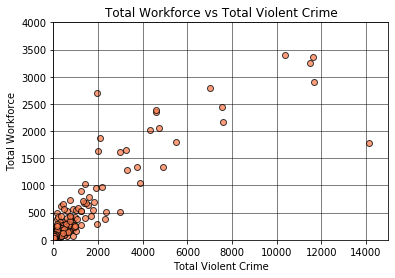

In [46]:
#fbi_census_df

x_axis = fbi_census_df["Total Violent Crime"]
y_axis = fbi_census_df["Total Workforce"]
#size = fbi_census_df["Population"]


# Build the scatter plots for each city types

plt.scatter(x_axis,y_axis,facecolors="coral",edgecolors="black",alpha=0.75)

# Incorporate the other graph properties

plt.title("Total Workforce vs Total Violent Crime")
plt.ylabel("Total Workforce")
plt.xlabel("Total Violent Crime")
plt.xlim(-1,15000)
plt.ylim(-1,4000)


plt.grid(color="black",linestyle="-",linewidth=0.5)

plt.savefig('Graph_Pics/ViolentCrimevWorkforce.png', bbox_inches='tight')

In [47]:
#cleaned_x_axis = fbi_census_df.loc[fbi_census_df["Law-Enforcement per 1000"] <= 25]
#cleaned_y_axis = fbi_census_df.loc[fbi_census_df["Total Crime"]/fbi_census_df["Population"]*1000 <= 200]

pearsonr_coefficient, p_value = pearsonr(x_axis,y_axis)
print (pearsonr_coefficient)

0.970565373110496


In [49]:
crit_val = stats.chi2.ppf(q = 0.95, df = 2)
print (crit_val)
e_x_axis = x_axis.mean()
e_y_axis = y_axis.mean()

x_df = pd.DataFrame(x_axis)
x_df["Expected"] = e_x_axis
y_df = pd.DataFrame(y_axis)
y_df["Expected"] = e_y_axis

#y_df
stats.chisquare(x_df["Total Violent Crime"], x_df['Expected'])
#stats.chisquare(y_df[0], y_df['Expected'])

#stats.ttest_ind(x_df["Law-Enforcement per 1000"], x_df['Expected'], equal_var=False)
#stats.ttest_ind(y_df["Population"], y_df['Expected Population'], equal_var=False)

5.991464547107979


Power_divergenceResult(statistic=16873221.442134008, pvalue=0.0)

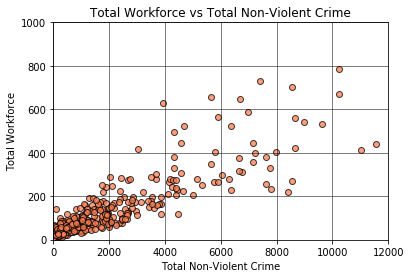

In [50]:
#fbi_census_df

x_axis = fbi_census_df["Total Non-Violent Crime"]
y_axis = fbi_census_df["Total Workforce"]
#size = fbi_census_df["Population"]


# Build the scatter plots for each city types

plt.scatter(x_axis,y_axis,facecolors="coral",edgecolors="black",alpha=0.75)

# Incorporate the other graph properties

plt.title("Total Workforce vs Total Non-Violent Crime")
plt.ylabel("Total Workforce")
plt.xlabel("Total Non-Violent Crime")
plt.xlim(-1,12000)
plt.ylim(-1,1000)


plt.grid(color="black",linestyle="-",linewidth=0.5)

plt.savefig('Graph_Pics/Non-ViolentCrimevWorkforce.png', bbox_inches='tight')

In [51]:
#cleaned_x_axis = fbi_census_df.loc[fbi_census_df["Law-Enforcement per 1000"] <= 25]
#cleaned_y_axis = fbi_census_df.loc[fbi_census_df["Total Crime"]/fbi_census_df["Population"]*1000 <= 200]

pearsonr_coefficient, p_value = pearsonr(x_axis,y_axis)
print (pearsonr_coefficient)

0.7783488444529767


In [52]:
crit_val = stats.chi2.ppf(q = 0.95, df = 2)
print (crit_val)
e_x_axis = x_axis.mean()
e_y_axis = y_axis.mean()

x_df = pd.DataFrame(x_axis)
x_df["Expected"] = e_x_axis
y_df = pd.DataFrame(y_axis)
y_df["Expected"] = e_y_axis

#y_df
stats.chisquare(x_df["Total Non-Violent Crime"], x_df['Expected'])
#stats.chisquare(y_df[0], y_df['Expected'])

#stats.ttest_ind(x_df["Law-Enforcement per 1000"], x_df['Expected'], equal_var=False)
#stats.ttest_ind(y_df["Population"], y_df['Expected Population'], equal_var=False)

5.991464547107979


Power_divergenceResult(statistic=46103818.90607126, pvalue=0.0)